# Image classification for road hazards using fast.ai cnn and resnet18

[fast.ai](https://course.fast.ai/videos/?lesson=2) tutorial followed

[docs.fast.ai](https://docs.fast.ai/index.html) code documentation 

Images sourced from Google Images

You need to run some Javascript code in your browser which will save the URLs of all the images you want for you dataset.

Press <kbd>Ctrl</kbd><kbd>Shift</kbd><kbd>J</kbd> in Windows/Linux and <kbd>Cmd</kbd><kbd>Opt</kbd><kbd>J</kbd> in Mac, and a small window the javascript 'Console' will appear. That is where you will paste the JavaScript commands.

You will need to get the urls of each of the images. Before running the following commands, you may want to disable ad blocking extensions (uBlock, AdBlockPlus etc.) in Chrome. Otherwise the window.open() command doesn't work. Then you can run the following commands:

```javascript
urls = Array.from(document.querySelectorAll('.rg_di .rg_meta')).map(el=>JSON.parse(el.textContent).ou);
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));
```

### Imports and seed

In [0]:
from fastai import *
from fastai.widgets import * # ImageCleaner widget
from fastai.vision import *
import pandas as pd

np.random.seed(42)

### labels/ folder names

In [0]:
#labels
url_file = 'normal'
url_file = 'hazards'
#folder = 'normal'
#folder = 'hazards'

### file path

In [0]:
path = Path('images')

### fastai's databunch w/ validation set of 20%, resize images to 224 & using a batch train for lower ram/cpu load

In [0]:
data = ImageDataBunch.from_folder(
    path,
    train='.',
    valid_pct=0.2,
    ds_tfms=get_transforms(),
    size=224,
    num_workers=1,
    bs=24
).normalize(
    imagenet_stats
)

### validating labels are correct

In [0]:
data.classes

['hazards', 'normal']

### validating images are indeed present

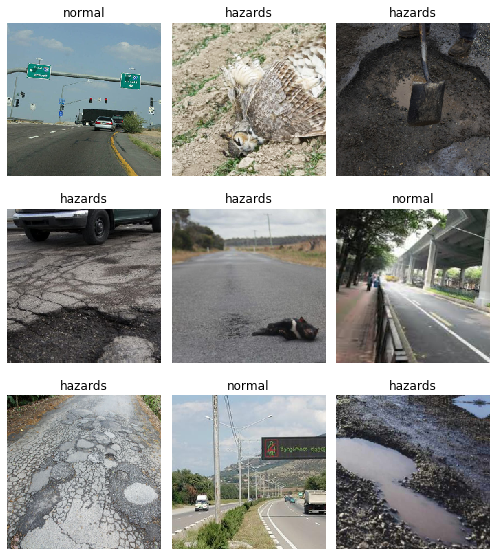

In [0]:
data.show_batch(rows=3, figsize=(7,8))

### validating size of train/val set

In [0]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['hazards', 'normal'], 2, 803, 200)

### Nueral network instantiation

In [0]:
learn = cnn_learner(data, models.resnet18, metrics=error_rate)

### fit nueral network to training data/ number of epochs specified

In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.451410,0.153054,0.035000,06:14
1,0.252303,0.104751,0.030000,05:13
2,0.174893,0.109608,0.030000,05:04
3,0.118602,0.111738,0.030000,05:05


### Save trained model weights

In [0]:
learn.save('stage-1')

### Make all weights trainable

In [0]:
learn.unfreeze()

### Identify learning rate

In [0]:
learn.lr_find() #doc(Learner) <- use to check docs

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


### Graphic representation of learning rate

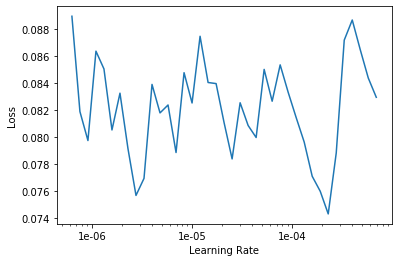

In [0]:
learn.recorder.plot()

### Continue training with new learning rate

In [0]:
learn.fit_one_cycle(2, max_lr=1e-04)

epoch,train_loss,valid_loss,error_rate,time
0,0.068395,0.100910,0.025000,05:36
1,0.048879,0.090858,0.010000,05:19


### save new weights

In [0]:
learn.save('stage-2')

In [0]:
learn.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (803 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
hazards,hazards,hazards,hazards,hazards
Path: images;

Valid: LabelList (200 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
hazards,hazards,normal,hazards,hazards
Path: images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_

### Plotting confusion matrix

In [0]:
interp=ClassificationInterpretation.from_learner(learn)

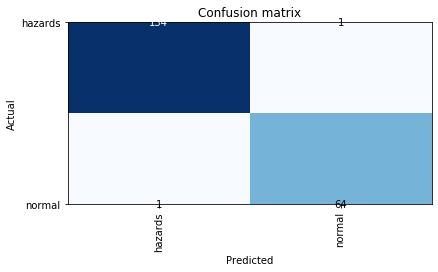

In [0]:
interp.plot_confusion_matrix()

In [0]:
interp.confusion_matrix()

array([[134,   1],
       [  1,  64]], dtype=int64)

### Displaying images with the highest amount of uncertainty

In [0]:
ds, idxs = DatasetFormatter().from_toplosses(learn)

In [0]:
ImageCleaner(ds, idxs, path)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

### Checking classification against single images

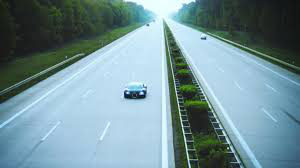

In [0]:
img = open_image('C:/Users/Cactuar/Pictures/bugatti.jpg'); img

In [0]:
pred_class, pred_idx, outputs=learn.predict(img)

In [0]:
pred_class

Category normal

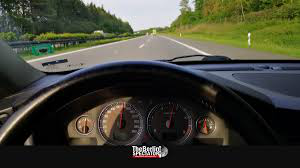

In [0]:
img = open_image('C:/Users/Cactuar/Pictures/dashboard.jpg'); img

In [0]:
pred_class, pred_idx, outputs=learn.predict(img)
pred_class

Category hazards

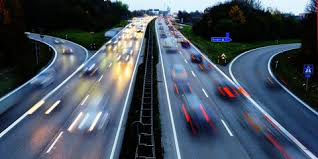

In [0]:
img = open_image('C:/Users/Cactuar/Pictures/traffic_1.jpg'); img

In [0]:
pred_class, pred_idx, outputs=learn.predict(img)
pred_class

Category normal

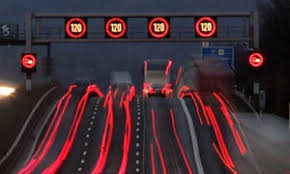

In [0]:
img = open_image('C:/Users/Cactuar/Pictures/timelapse.jpg'); img

In [0]:
pred_class, pred_idx, outputs=learn.predict(img)
pred_class

Category normal